# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Pablo Daniel Vargas Cárdenas

- ID: A00344869

- My carreer: IRS


# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [4]:
csv = "A00344869_X.csv"

dataset = pd.read_csv(csv)

dataset.head()

Unnamed: 0        x1        x2        x3        x4        x5        x6  \
0           0 -6.212568 -6.319225 -1.382240 -4.741465  2.661752 -5.487350   
1           1 -9.601859 -2.278299  5.765572 -5.172151 -4.613786  5.098367   
2           2  8.106766  4.428783  0.003703 -5.381840 -3.345228  2.823255   
3           3 -4.510108  4.788033 -9.108139  7.755558 -2.014943 -5.086624   
4           4  7.414254  5.861823 -2.531418 -1.854479 -7.275251  0.761795   

         x7        x8        x9  ...      x159      x160      x161      x162  \
0 -5.596809 -3.196468 -7.599598  ... -3.906659  6.082741  7.938612 -6.210663   
1 -1.706512 -3.113418  3.418371  ...  4.185959  2.996018 -6.338506 -4.458185   
2 -9.593445  4.492147 -4.523154  ... -0.989157  0.337530 -5.599448  9.737454   
3 -3.493996 -1.249766  2.963848  ...  6.350029 -7.033210  8.758806  5.653945   
4 -5.162785  8.473929 -3.331511  ... -5.124509 -3.123567  4.359701  6.735220   

        x163      x164       x165      x166       x167      x168  
0   5.460512  0.365605 -10.714808  4.979740  -8.420025 -3.102854  
1  -3.448206 -8.823649  -1.960672  9.942652  -7.927644  2.176686  
2  11.392943 -3.584973   1.126007  2.696347   5.286228 -4.456748  
3  -5.762600  2.592845   6.193972  3.167139  12.098462  6.328819  
4   7.476075 -4.370742   2.666642  0.265355   5.897871 -1.702716  

[5 rows x 169 columns]

In [7]:
#No se si lo hizo a proposito que mi dataset tuviera 169 columnas y 27,000 filas... voy a reducirlo al promedio 
#del tamaño de los otros datasets del grupo, es lo legal. 

nuevo_dataset = dataset.iloc[:1000, :20]
nuevo_dataset.shape


(1000, 20)

## b) Data managment


Print the first 7 rows

In [8]:
nuevo_dataset.head(7)

Unnamed: 0        x1        x2        x3         x4        x5        x6  \
0           0 -6.212568 -6.319225 -1.382240  -4.741465  2.661752 -5.487350   
1           1 -9.601859 -2.278299  5.765572  -5.172151 -4.613786  5.098367   
2           2  8.106766  4.428783  0.003703  -5.381840 -3.345228  2.823255   
3           3 -4.510108  4.788033 -9.108139   7.755558 -2.014943 -5.086624   
4           4  7.414254  5.861823 -2.531418  -1.854479 -7.275251  0.761795   
5           5  7.238299 -4.172542  2.029665  15.105728  0.737776  3.298138   
6           6  4.357704 -5.419906  5.367982 -11.234985 -8.205367 -8.459715   

          x7        x8        x9        x10       x11       x12       x13  \
0  -5.596809 -3.196468 -7.599598   0.834402 -2.711669  0.064643  5.904451   
1  -1.706512 -3.113418  3.418371   2.730424  8.150549  5.183183 -2.622326   
2  -9.593445  4.492147 -4.523154   4.013073 -3.840654  0.887064  4.161569   
3  -3.493996 -1.249766  2.963848   2.107156 -4.200639 -6.645839 -5.056916   
4  -5.162785  8.473929 -3.331511   3.716438 -8.349002  3.804713  3.962441   
5 -10.355359 -7.989433 -8.947596 -11.567069 -8.937564  6.373620  5.138338   
6  -7.257072 -4.335350  6.317266   1.847615  6.456208 -6.876794 -0.716599   

        x14       x15        x16        x17       x18        x19  
0 -5.118225 -1.711979   3.242198   6.870576  2.804733   0.466678  
1  9.705625  2.222499  -8.741225   2.890099 -7.082115  -2.732542  
2  5.469089  1.734982   3.999127   0.615576  5.213410   3.145026  
3  1.777339  8.215595 -10.756238  -8.049598  7.234311  10.636886  
4  3.065382 -4.025026   4.863174  -3.148054  5.338890   1.966486  
5 -2.576774 -0.362463  -5.352570   8.211478 -2.580051  -7.028491  
6 -4.911976  8.631994 -10.706918 -10.336172 -0.958106   1.166165

Print the last 4 rows

In [9]:
nuevo_dataset.tail(4)

Unnamed: 0        x1        x2        x3        x4        x5        x6  \
996         996  4.047564  0.830500 -2.118124 -7.833152 -5.759302  0.219221   
997         997 -5.177426 -8.166462 -2.408148 -3.546783  1.215263  3.735369   
998         998 -6.950267 -0.214627  5.997316 -3.818815  1.188126 -1.167303   
999         999 -9.370122 -4.112707  8.255115 -6.272243 -4.799561  8.121660   

           x7        x8        x9        x10       x11       x12        x13  \
996 -6.994946  8.697600 -7.298438   3.047424 -5.523042 -1.839639   5.204357   
997 -8.360724  2.669207  3.865812 -10.482449 -6.834238 -0.216998  -4.703600   
998 -5.571675 -3.056807  2.069444  -8.380974 -1.005278 -7.366697 -10.169834   
999  0.009313 -3.833649  4.886074   3.546478  3.077979  7.280821  -2.864917   

           x14       x15       x16       x17       x18       x19  
996   3.388403 -4.352990 -1.104711  2.837016  2.167347  3.308077  
997   1.747667  4.236889  5.852671  4.200711 -2.161242 -8.686813  
998   4.121196  2.175246  2.580020 -1.180648 -1.629594 -5.021694  
999  12.206330 -0.923821 -9.853502  6.938577 -7.012251  0.705205

How many rows and columns are in your data?

Use the `shape` method


In [10]:
nuevo_dataset.shape

(1000, 20)

Print the name of all columns

Use the `columns` method

In [11]:
nuevo_dataset.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [12]:
nuevo_dataset.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
x13           float64
x14           float64
x15           float64
x16           float64
x17           float64
x18           float64
x19           float64
dtype: object

What is the meaning of rows and columns?

Your responses here

1. Cada columna representa la feature a la que corresponde la observación

2. Cada fila es en sí la observación, su valor/record.

3. Por el momento a lo que veo parece que el dataset fue generado de forma aleatoria con un rango especifico de valores númericos para cada feature.

...

Print a statistical summary of your columns


In [13]:
nuevo_dataset.describe()

Unnamed: 0           x1           x2           x3           x4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000    -1.382737    -1.379950    -1.677987    -0.495942   
std     288.819436     7.074894     5.878941     6.532794     6.092057   
min       0.000000   -15.254758   -14.719222   -14.773497   -13.244454   
25%     249.750000    -7.542977    -6.155949    -7.479653    -5.683338   
50%     499.500000    -3.016223    -1.236464    -1.768100    -1.073328   
75%     749.250000     5.081583     3.747012     3.628566     4.399000   
max     999.000000    14.786261    11.401816    15.027118    15.105728   

                x5           x6           x7           x8           x9  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.599475    -0.972294    -2.434602    -0.095773    -0.094782   
std       5.470720     5.270796     6.121451     6.119805     5.054606   
min     -13.370759   -14.365110   -14.653463   -13.422880   -12.712906   
25%      -3.456444    -5.161683    -7.527145    -5.021246    -3.977276   
50%       0.431504    -1.465447    -3.740302    -0.076553    -0.268371   
75%       4.751025     2.853231     2.386013     4.983027     3.808346   
max      12.937529    11.334955    14.366077    12.486046    11.739259   

               x10          x11          x12          x13          x14  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.107259    -1.645655    -1.190318    -0.874959    -1.022119   
std       6.028788     5.164053     6.679603     5.660919     5.983659   
min     -14.652554   -13.192864   -14.754994   -15.729424   -13.288304   
25%      -3.213028    -5.475907    -7.145444    -5.455607    -6.269511   
50%       2.314324    -2.752707    -1.570695    -0.812878    -0.985771   
75%       5.633813     1.790684     4.881571     3.684124     3.692304   
max      15.511753    11.693287    13.376875    11.926292    13.798679   

               x15          x16          x17          x18          x19  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      0.660628    -1.860773    -0.079852    -0.195521     0.099205  
std       5.390580     6.333643     5.611838     5.904631     5.350532  
min     -14.338898   -17.050376   -13.545035   -13.691067   -12.256204  
25%      -3.380418    -7.779488    -4.457628    -5.291481    -3.830221  
50%       0.197589    -1.504155    -0.311996    -0.405650    -0.527345  
75%       4.307165     3.340775     4.303600     4.441150     3.001028  
max      14.762274    12.477428    14.011969    14.473960    13.675434

1. What is the minumum and maximum values of each variable:
For Column 'Unnamed: 0' to column'x19' respetively:
min	[ 0.000000	-15.254758	-14.719222	-14.773497	-13.244454	-13.370759	-14.365110	-14.653463	-13.422880	-12.712906	-14.652554	-13.192864	-14.754994	-15.729424	-13.288304	-14.338898	-17.050376	-13.545035	-13.691067	-12.256204]

max	[999.000000	14.786261	11.401816	15.027118	15.105728	12.937529	11.334955	14.366077	12.486046	11.739259	15.511753	11.693287	13.376875	11.926292	13.798679	14.762274	12.477428	14.011969	14.473960	13.675434]

2. What is the mean and standar deviation of each variable:
mean	[499.500000	-1.382737	-1.379950	-1.677987	-0.495942	0.599475	-0.972294	-2.434602	-0.095773	-0.094782	1.107259	-1.645655	-1.190318	-0.874959	-1.022119	0.660628	-1.860773	-0.079852	-0.195521	0.099205]

std	[288.819436	7.074894	5.878941	6.532794	6.092057	5.470720	5.270796	6.121451	6.119805	5.054606	6.028788	5.164053	6.679603	5.660919	5.983659	5.390580	6.333643	5.611838	5.904631	5.350532]


3. What the 25%, 50% and 75% represent?:
Representan los cuartiles relativos a la desviación estandar. Siendo por ejemplo 25% el primer cuartil, y 75% el tercero. 25% significa que el 25% de los datos están bajo ese valor, y así con todos.

Rename the columns using the same name with capital letters

In [15]:
nuevo_dataset.columns = [col.upper() for col in nuevo_dataset.columns]
nuevo_dataset.columns

Index(['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19'],
      dtype='object')

Rename the columns to their original names

In [17]:
nuevo_dataset.columns = [col.lower() for col in nuevo_dataset.columns]
nuevo_dataset.rename(columns={'unnamed: 0': 'Unnamed: 0'}, inplace=True)
nuevo_dataset.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19'],
      dtype='object')

Use two different alternatives to get one of the columns

In [22]:
# Con brackets
nuevo_dataset['x10']

#Con Loc
nuevo_dataset.loc[:, 'x3']

0     -1.382240
1      5.765572
2      0.003703
3     -9.108139
4     -2.531418
         ...   
995   -7.385796
996   -2.118124
997   -2.408148
998    5.997316
999    8.255115
Name: x3, Length: 1000, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [33]:
nuevo_dataset.iloc[62:73, 1:3]

x1         x2
62  3.552842  -5.482285
63  8.967204   3.476921
64 -3.042598   1.927562
65  7.596620  -4.087635
66 -6.304984   2.587033
67 -4.498128  -4.978598
68 -8.690734   0.324664
69  8.413967   7.677181
70  3.987500 -10.000000
71  0.501196  -7.795189
72 -5.795692  -1.983283

For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [39]:
nulls_x1 = nuevo_dataset.iloc[:, 1].isnull().sum()
not_nulls_x1 = nuevo_dataset.iloc[:, 1].notnull().sum()

nulls_x2 = nuevo_dataset.iloc[:, 2].isnull().sum()
not_nulls_x2 = nuevo_dataset.iloc[:, 2].notnull().sum()

print(f'Valores nulos en x1: {nulls_x1}')
print(f'Valores nulos en x2: {nulls_x2}')

print(f'Valores no nulos en x1: {not_nulls_x1}')
print(f'Valores no nulos en x2: {not_nulls_x2}') 

total_rows = nuevo_dataset.shape[0]

if nulls_x1 + not_nulls_x1 == total_rows:
    print(True)
else:
    print('x1 no es igual al numero total de filas')
if nulls_x2 + not_nulls_x2 == total_rows:
    print(True)
else:
    print('x2 no es igual al numero total de filas')



Valores nulos en x1: 0
Valores nulos en x2: 0
Valores no nulos en x1: 1000
Valores no nulos en x2: 1000
True
True


Discard the last column


In [40]:
nuevo_dataset = nuevo_dataset.drop(columns=nuevo_dataset.columns[-1])
nuevo_dataset.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18'],
      dtype='object')

### Questions

Based on the previos results, provide a full description of yout dataset

Your response:
Parece ser que el dataset tiene solo valores numericos flotantes que van de un rango de -16 a 16. Dudo que signifiquen algo parecen más bien estar hechos por un random seed dichos números en todas las features.



## c) Data visualization

Plot in the histogram of one of the variables

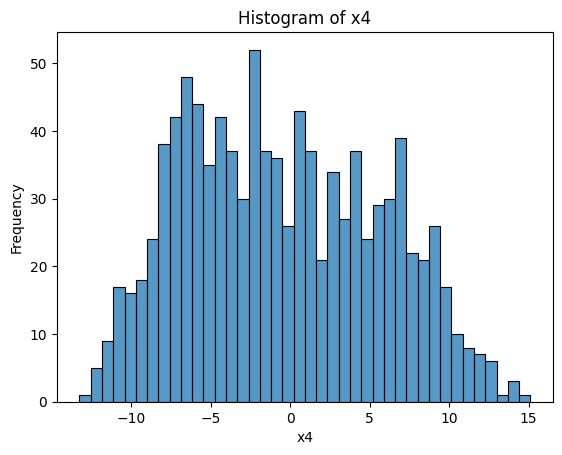

In [49]:
sns.histplot(nuevo_dataset['x4'], bins=40, kde=False)
plt.title('Histogram of x4')
plt.xlabel('x4')
plt.ylabel('Frequency')
plt.show()

Plot in the same figure the histogram of two variables



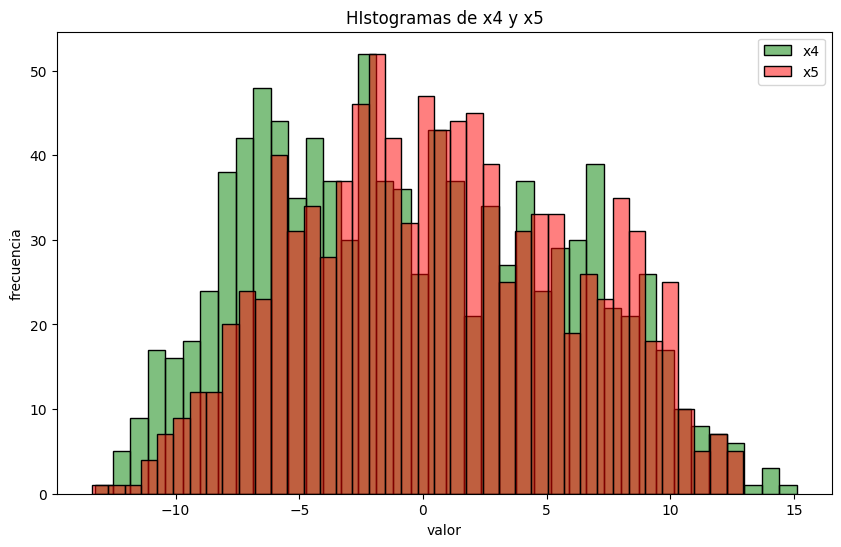

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(nuevo_dataset['x4'], bins=40, color='green', label='x4', alpha=0.5)
sns.histplot(nuevo_dataset['x5'], bins=40, color='red', label='x5', alpha=0.5)
plt.title('Histogramas de x4 y x5')
plt.xlabel('valor')
plt.ylabel('frecuencia')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here: Parece ser que siguen una distribución normal de campana. Lo que me hace pensar que aunque son generados de forma aleatoria, se les pidio que siguieran una distribución normal con media en 0 y su respectiva desviación.

Plot the boxplot of one of the variables

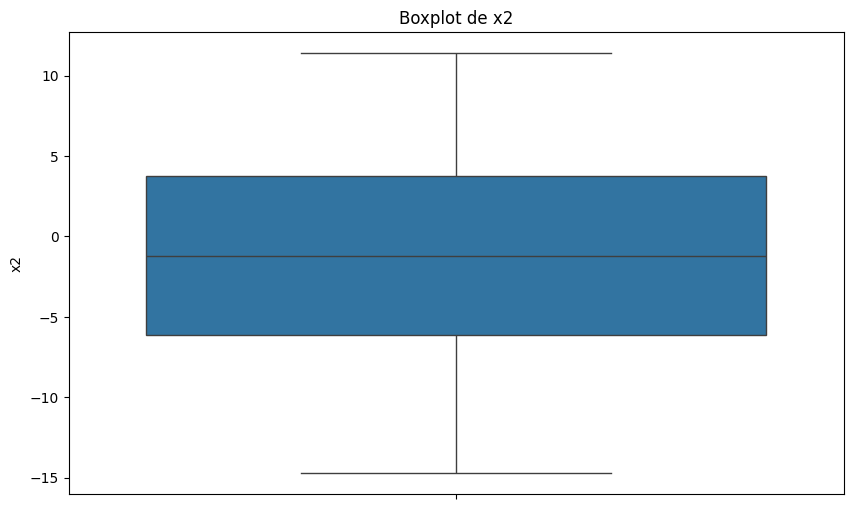

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=nuevo_dataset['x2'])
plt.title('Boxplot de x2')
plt.ylabel('x2')
plt.show()


Plot in the same figure the boxplot of two variables

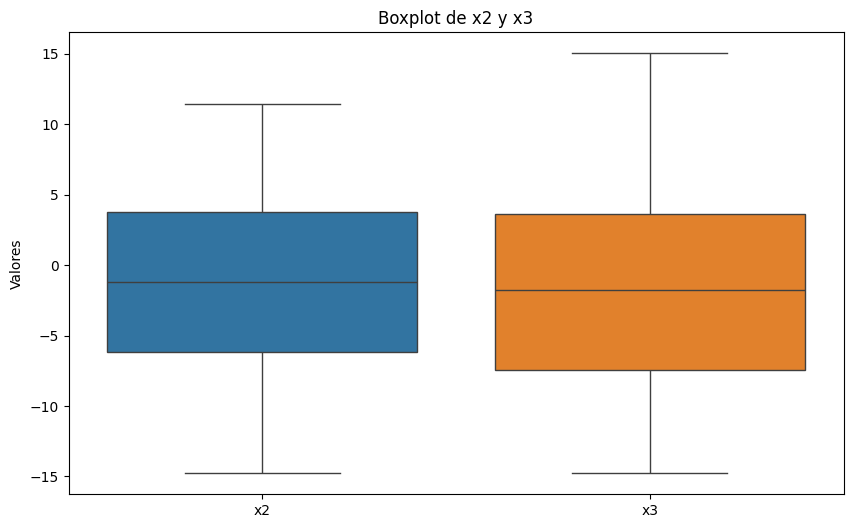

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=nuevo_dataset[['x2', 'x3']])
plt.title('Boxplot de x2 y x3')
plt.ylabel('Valores')
plt.show()

Based on these plots, provide a description of your data:

Your response here: Lo esperado y dicho antes, una distribución normal en ambos casos. 

Plot the scatter plot between all pair of variables

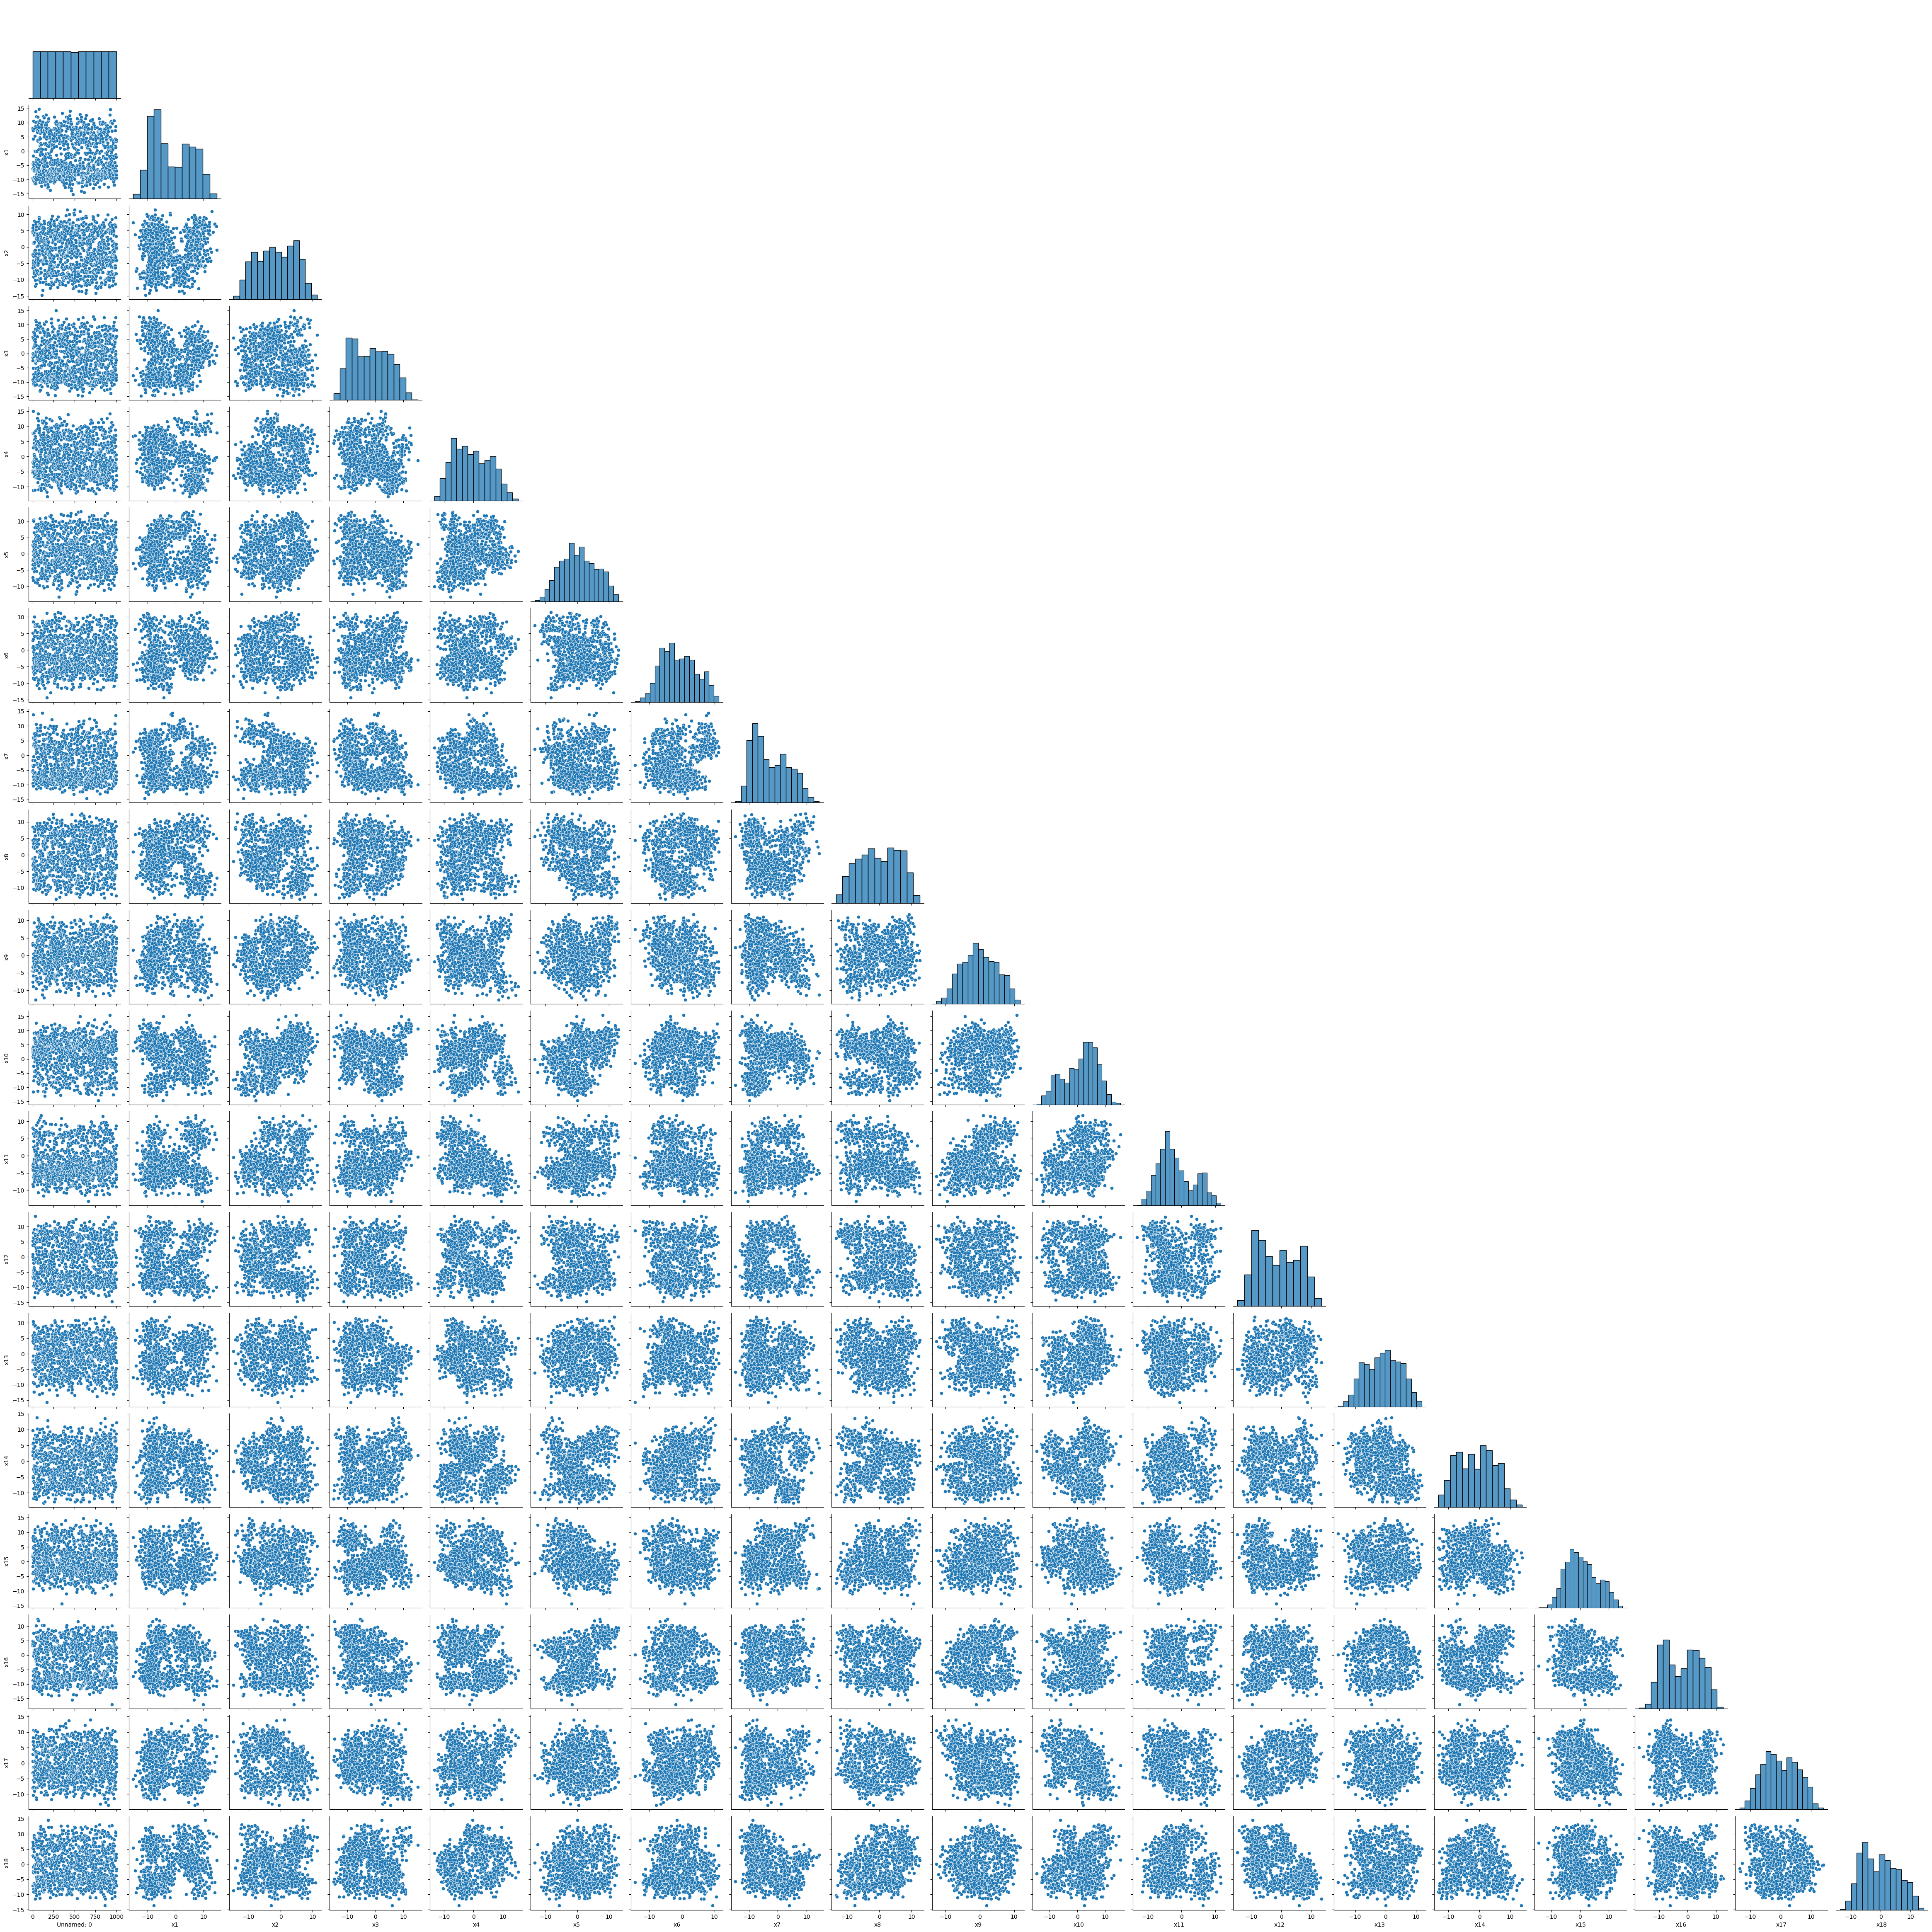

In [53]:
sns.pairplot(nuevo_dataset, corner=True)
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:
Quien hizo este dataset, basicamente se inventó los números, todos siguen la misma distribución normal en media 0 a excepcion de x1. No mucho que se pueda analizar la verdad. Ni siquiera es posible apreciar clusteres... 




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [56]:
from sklearn.cluster import KMeans

#Vamos a probar con 10
kmeans = KMeans(n_clusters=10, random_state=42)

kmeans.fit(nuevo_dataset.iloc[:, 1:])  

nuevo_dataset['Cluster'] = kmeans.labels_


Add to your dataset a column with the estimated cluster to each data point

In [55]:
cluster_counts = nuevo_dataset['Cluster'].value_counts()
print(cluster_counts)

Cluster
4    218
3    167
9    116
5     96
2     92
6     85
1     82
8     49
7     48
0     47
Name: count, dtype: int64


Print the number associated to each cluster

In [57]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-7.05670119  3.82444225  5.91254079  4.64267221  3.53893671 -5.19097311
  -8.8407213   5.29658172  2.17062058  7.99877875 -2.43070591 -7.74849094
   2.37847226 -1.89105992 -1.6580465  -6.68082973 -6.62568321  7.15633439
   2.56097561]
 [ 5.90546847 -2.05015323  0.28869269 -4.26861584 -4.71293021 -0.58990412
  -0.01143237  4.09760472  1.23480655 -2.0261258   0.38487723 -8.67086907
  -1.64013339 -3.28667268  5.64192276 -3.47820263 -2.81237198  2.39154842
   5.02424242]
 [ 5.00842157 -3.67341894 -3.25643304 -2.24205635  1.24723305  1.97155229
  -7.83952905  3.72739896 -1.03114259  5.52910562 -3.59375019 -0.01339985
   4.21529284  2.32267864 -1.87781863  4.28744354 -4.47105529  6.8278843
   2.        ]
 [-4.25099531  1.21282961 -7.67413541 -1.47329391 -5.96967079 -9.64113415
  -1.90938982  3.58812126  4.95935109 -1.98584279 -6.55152831  8.91233591
  -9.27286117  0.65021777  7.09454054  0.31670684 -1.74453357 -6.32386666
   4.        ]
 [-4.27881774 -1.8362772  -2.69117193  2.93074147  6.

Print the centroids

In [58]:
inertia = kmeans.inertia_
print(inertia)


313516.62672318006


Print the intertia metric

Text(0, 0.5, 'x2')

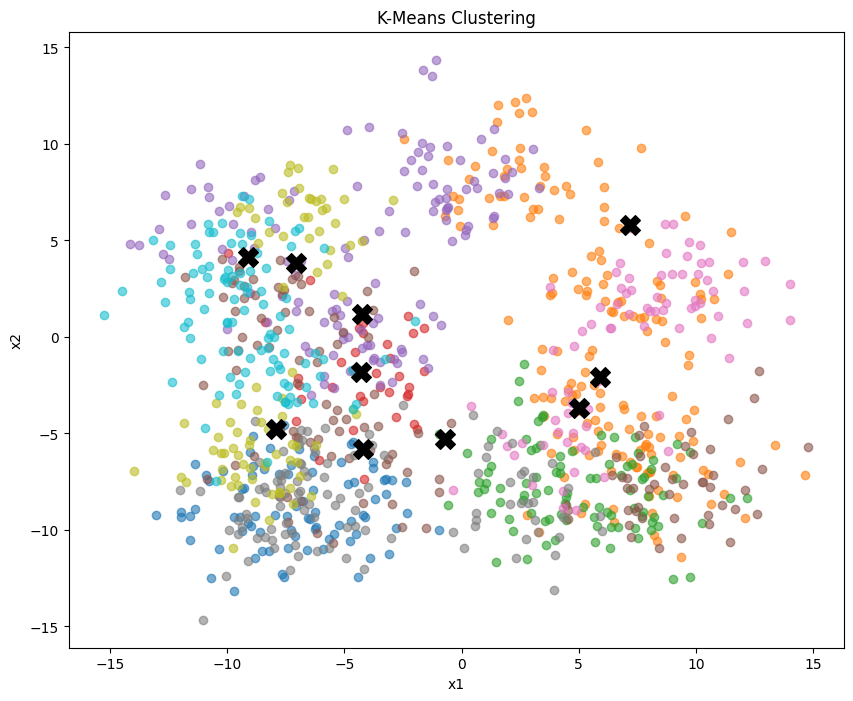

In [62]:
plt.figure(figsize=(10, 8))

for cluster_num in range(10):
    cluster_data = nuevo_dataset[nuevo_dataset['Cluster'] == cluster_num]
    plt.scatter(cluster_data['x1'], cluster_data['x7'], label=f'Cluster {cluster_num}', alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('x1')
plt.ylabel('x2')

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

### Questions

Provides a detailed description of your results

Your response:
Podemos observar que realmente no hay diferencias entre nuestras features que podamos clusterizar, la unica que tiene si acaso algo de diferencia es la feature 'x1' por las demas podemos suponer que son mismas distribuciones en el mismo rango númerico.


## d) Elbow plot

Compute the Elbow plot

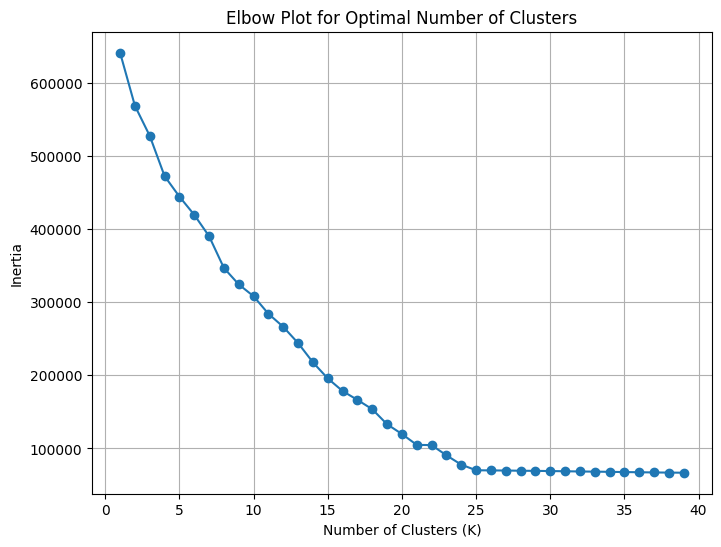

In [66]:
cluster_range = range(1, 40)
inertia_values = []



for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(nuevo_dataset.iloc[:, 1:])  # Exclude 'Unnamed: 0'
    inertia_values.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: 25, en 25 el error se minimiza y la inercia se estanca. El gran número de K hace pensar que no existe un número apto para clusterizar este problema.


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: No, había puesto 10 y al parecer 25 se ajusta mejor a las observaciones en el dataset.



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [72]:
# Import the dataset
from sklearn.datasets import load_digits

# Load the dataset
digits = load_digits()

digits.data.shape

(1797, 64)

2) Plot some of the observations (add in the title the label/digit of that obserbation)

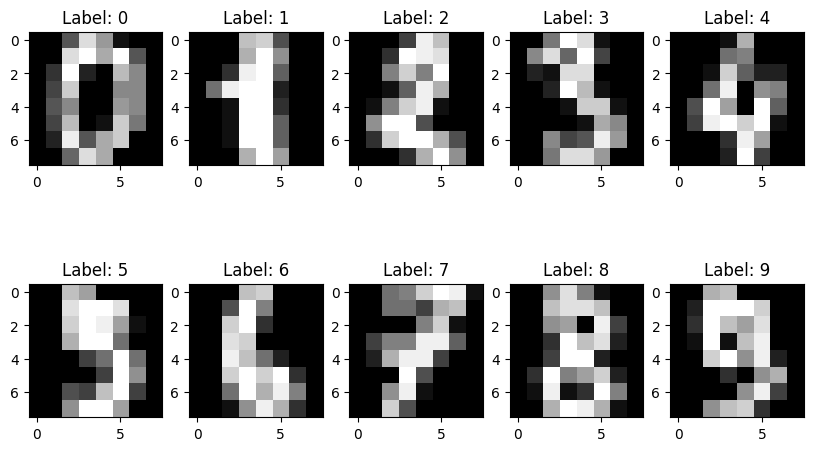

In [70]:
plt.figure(figsize=(10, 6))

for index in range(10):
    plt.subplot(2, 5, index + 1)
    plt.imshow(digits.images[index], cmap='gray')
    plt.title(f"Label: {digits.target[index]}")

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [73]:
n = 10 

# KMeansAll
kmeans_all = KMeans(n_clusters=n, random_state=42)
kmeans_all.fit_predict(digits.data)
digits['KmeansAll'] = kmeans_all.labels_

# first row (8 features)
kmeans_1row = KMeans(n_clusters=n, random_state=42)
kmeans_1row.fit_predict(digits.data[:, :8])
digits['Kmeans1row'] = kmeans_1row.labels_

# fourth row (8 features)
kmeans_4row = KMeans(n_clusters=n, random_state=42)
kmeans_4row.fit_predict(digits.data[:, 24:32])
digits['Kmeans4row'] = kmeans_4row.labels_

# eighth row (8 features)
kmeans_8row = KMeans(n_clusters=n, random_state=42)
kmeans_8row.fit_predict(digits.data[:, 56:64])
digits['Kmeans8row'] = kmeans_8row.labels_

In [74]:

kmeans_results = {
    'KmeansAll': digits['KmeansAll'],
    'Kmeans1row': digits['Kmeans1row'],
    'Kmeans4row': digits['Kmeans4row'],
    'Kmeans8row': digits['Kmeans8row']
}

kmeans_results

{'KmeansAll': array([5, 7, 7, ..., 8, 9, 8], dtype=int32),
 'Kmeans1row': array([2, 9, 3, ..., 9, 2, 4], dtype=int32),
 'Kmeans4row': array([8, 1, 7, ..., 6, 5, 6], dtype=int32),
 'Kmeans8row': array([3, 5, 6, ..., 3, 5, 5], dtype=int32)}

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

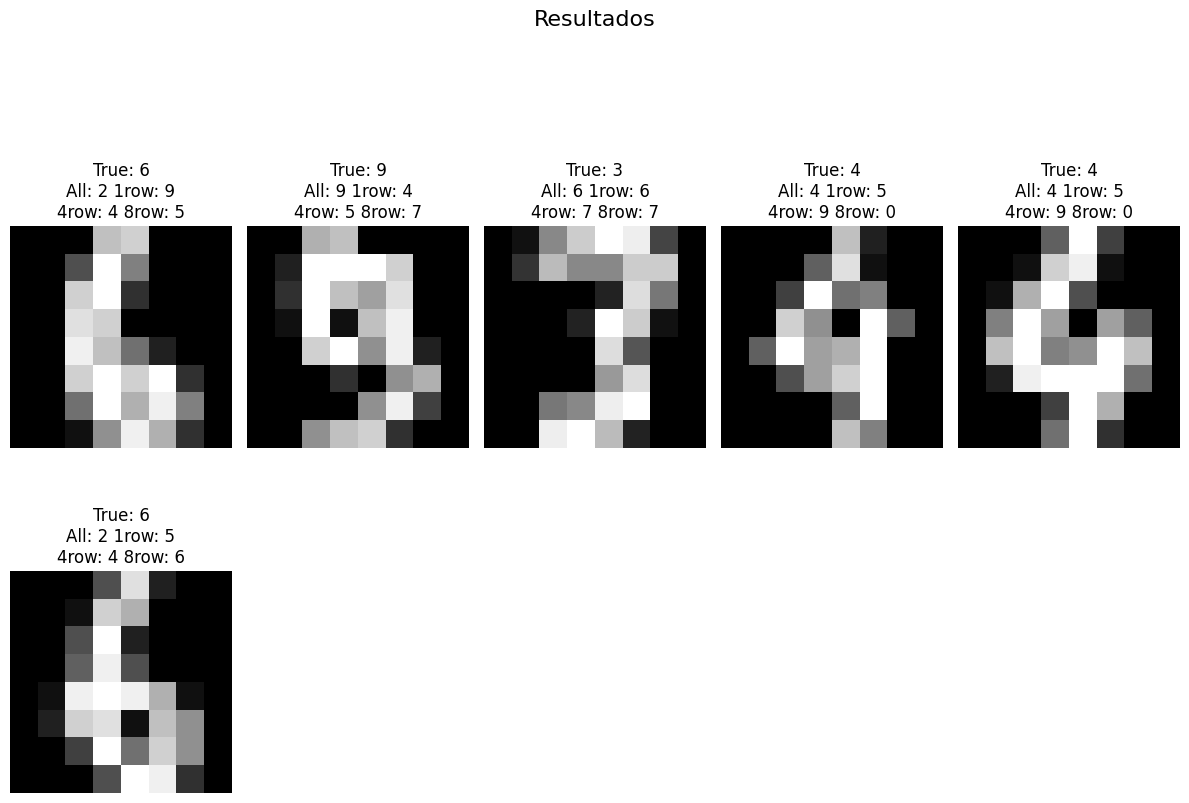

In [76]:
sample_indices = [6, 9, 23, 24, 64, 34]

plt.figure(figsize=(12, 8))
for idx, sample_idx in enumerate(sample_indices):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(digits.images[sample_idx], cmap='gray')
    plt.title(f"True: {digits.target[sample_idx]}\nAll: {digits['KmeansAll'][sample_idx]} "
              f"1row: {digits['Kmeans1row'][sample_idx]}\n4row: {digits['Kmeans4row'][sample_idx]} "
              f"8row: {digits['Kmeans8row'][sample_idx]}")
    plt.axis('off')

plt.suptitle("Resultados", y=1.1, fontsize=16)
plt.tight_layout()
plt.show()

5) Compute the Elbow plot

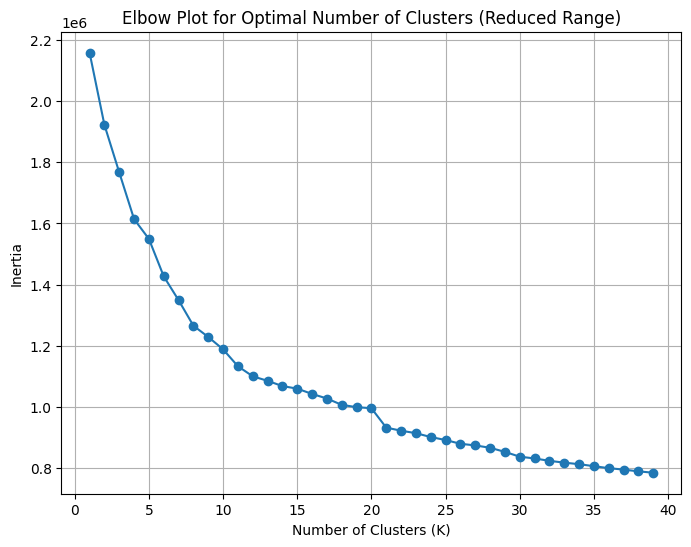

In [77]:
rango = range(1, 40)
inertia_values = []

for k in rango:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(digits.data)
    inertia_values.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Plot for Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

Es de esperarse que la clusterización con todas las features osea los 64 pixeles consiga un mejor resultado que los otros, ya que en este caso cada pixel otorga información relevante para la identificación del número en la imagen. En este caso considero que no es relevante hacer el elbow plot ya que de antemano se sabe que buscamos 10 clases, no mas no menos por lo que hacer mas grupos o menos es un poco ilogico. La clusterización para este tipo de problema no es para nada la solución más optima por su naturaleza ya que es un tipo de aprendizaje no supervisado.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [78]:
# Import the dataset
from sklearn.datasets import load_digits

# Load the dataset
digits = load_digits()

digits.data.shape

(1797, 64)

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

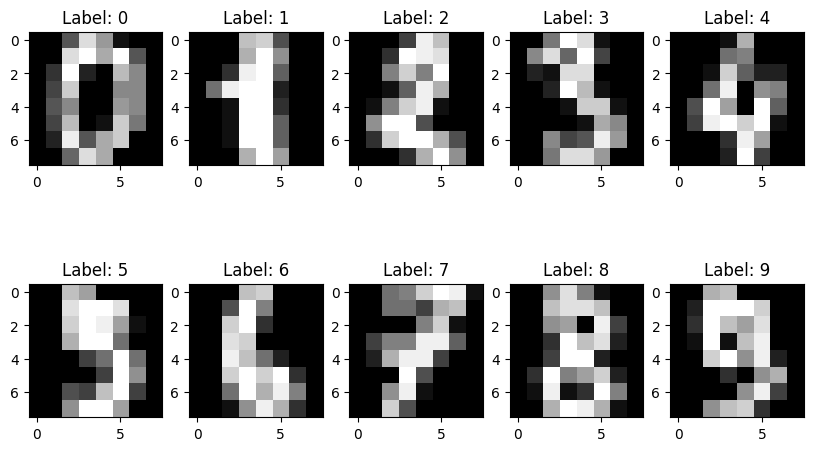

In [79]:
plt.figure(figsize=(10, 6))

for index in range(10):
    plt.subplot(2, 5, index + 1)
    plt.imshow(digits.images[index], cmap='gray')
    plt.title(f"Label: {digits.target[index]}")

3) Split the dataset in train and test

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((1437, 64), (360, 64)), ((1437,), (360,)))

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [81]:
X_train_all = X_train
X_train_1col = X_train[:, :8]  # First column features
X_train_4col = X_train[:, 24:32]  # Fourth column features
X_train_8col = X_train[:, 56:64]  # Eighth column features

X_test_all = X_test
X_test_1col = X_test[:, :8]
X_test_4col = X_test[:, 24:32]
X_test_8col = X_test[:, 56:64]

5) Make predictions (use the test set)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV


def tune_rf_classifier(X_train, X_test, y_train, y_test, classifier_name):
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [5, 10, 15],        # Maximum depth of the tree
        'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    }
    
    clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)

    # Best parameters and performance
    print(f"Best parameters for {classifier_name}: {clf.best_params_}")
    
    y_pred = clf.predict(X_test)
    print(f"Accuracy for {classifier_name}: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

In [85]:
print("ClassifierAll:")
tune_rf_classifier(X_train_all, X_test_all, y_train, y_test, "ClassifierAll")

ClassifierAll:
Best parameters for ClassifierAll: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for ClassifierAll: 0.9805555555555555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [86]:
print("\nClassifier1col:")
tune_rf_classifier(X_train_1col, X_test_1col, y_train, y_test, "Classifier1col")


Classifier1col:
Best parameters for Classifier1col: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy for Classifier1col: 0.4583333333333333
              precision    recall  f1-score   support

           0       0.32      0.45      0.38        33
           1       0.50      0.39      0.44        28
           2       0.51      0.55      0.53        33
           3       0.24      0.21      0.22        34
           4       0.71      0.63      0.67        46
           5       0.70      0.55      0.62        47
           6       0.42      0.63      0.51        35
           7       0.47      0.50      0.49        34
           8       0.32      0.30      0.31        30
           9       0.33      0.28      0.30        40

    accuracy                           0.46       360
   macro avg       0.45      0.45      0.45       360
weighted avg       0.47      0.46      0.46       360



In [87]:
print("\nClassifier4col:")
tune_rf_classifier(X_train_4col, X_test_4col, y_train, y_test, "Classifier4col")


Classifier4col:
Best parameters for Classifier4col: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Classifier4col: 0.6777777777777778
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.50      0.57      0.53        28
           2       0.63      0.58      0.60        33
           3       0.63      0.76      0.69        34
           4       0.73      0.83      0.78        46
           5       0.70      0.60      0.64        47
           6       0.77      0.86      0.81        35
           7       0.70      0.68      0.69        34
           8       0.48      0.33      0.39        30
           9       0.64      0.62      0.63        40

    accuracy                           0.68       360
   macro avg       0.67      0.67      0.67       360
weighted avg       0.67      0.68      0.67       360



6) Compute performance metrics

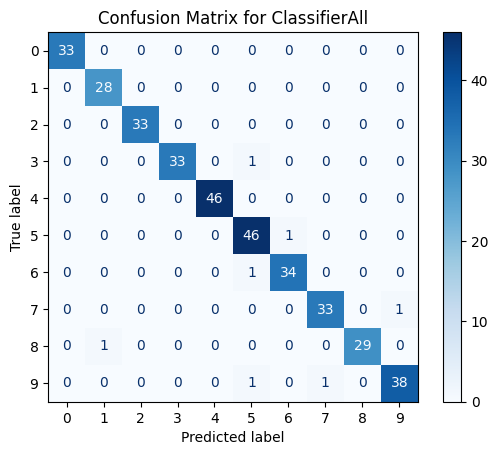

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200, random_state=42)

clf.fit(X_train, y_train)
# Predict the labels for the test set using the best model
y_pred = clf.predict(X_test_all)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=digits.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for ClassifierAll')
plt.show()

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

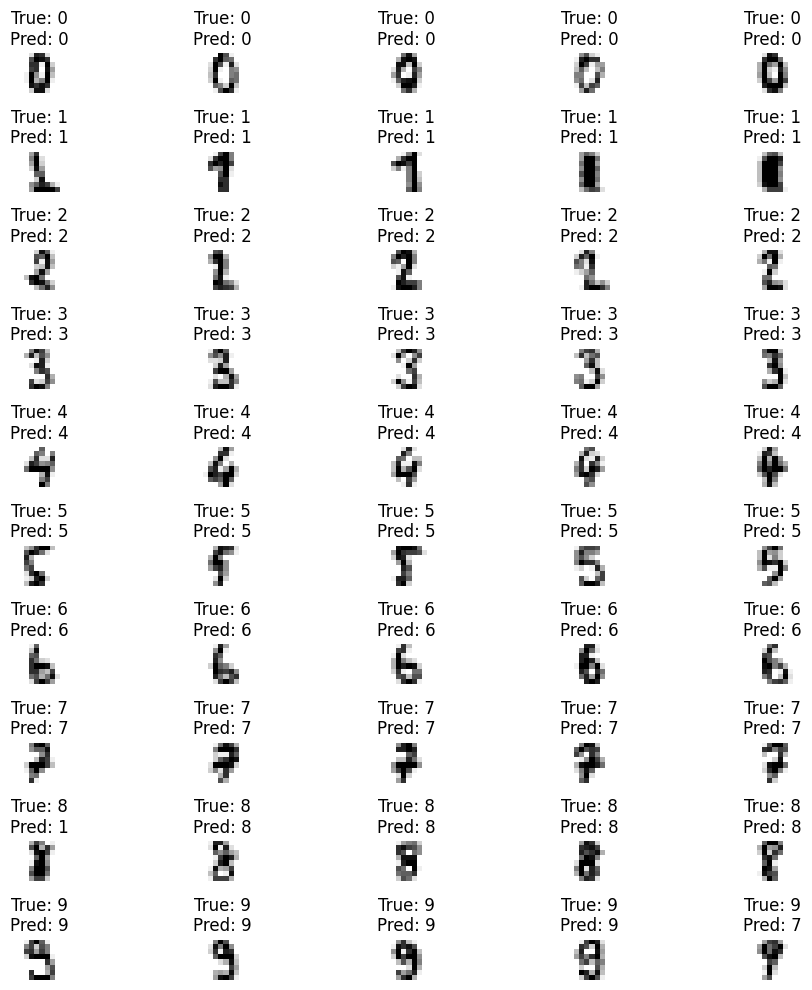

In [90]:
num_samples = 5  
fig, axes = plt.subplots(10, num_samples, figsize=(10, 10))

for digit in range(10):
    digit_indices = np.where(y_test == digit)[0]
    selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
    
    for i, index in enumerate(selected_indices):
        ax = axes[digit, i]
        ax.imshow(X_test[index].reshape(8, 8), cmap=plt.cm.gray_r)
        ax.set_title(f'True: {y_test[index]}\nPred: {y_pred[index]}')
        ax.axis('off')

plt.tight_layout()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

Por supuesto con todas las features, osea ClassifierAll podemos ver un Accuracy del 98% mientras que con Classifier4col tenemos 66.6 o 44.4 de accuracy con Classifier1col. Con GridSearch se encontrarón los mejores hiperametros que fue un RandomFClassifier con 15 de profundidad y 200 estimadores.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:
Bastante bien, ya tenía experiencia y noción trabajando con aprendizaje no supervisado pero fue interesante volver a retomar un poco como lo fue con Kmeans. Especialmente encontrar aquellas features relevantes al problema considero es muy importante.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
También muy bien. Desde un inicio sabía que clusterización no serviría para nada para el problema de las imagenes de digitos ya que es un problema se aprendizaje supervisado y no unsupervisado. Fue bueno retomar bases ya vistas en esta clase.